# <span style="color: #2e6c80;">**Capstone Project**</span>

## Automated Anomaly Detection for Predictive Maintenance

**Problem Statement:**

Many different industries need predictive maintenance solutions to reduce risks and gain actionable insights through processing data from their equipment.
Although system failure is a very general issue that can occur in any machine, predicting the failure and taking steps to prevent such failure is most important for any machine or software application.
Predictive maintenance evaluates the condition of equipment by performing online monitoring. The goal is to perform maintenance before the equipment degrades or breaks down.
This Capstone project is aimed at predicting the machine breakdown by identifying the anomalies in the data.
The data we have contains about 18000+ rows collected over few days. The column ‘y’ contains the binary labels, with 1 denoting there is an anomaly. The rest of the columns are predictors.

### Loading the required libraries

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [144]:
# Loading the dataset
data = pd.read_excel('AnomaData.xlsx')
# Displaying the first few rows of the dataset
data.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [145]:
data.columns

Index(['time', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60',
       'y.1'],
      dtype='object')

In [146]:
data.drop(['y.1','time'],axis=1,inplace=True)

## Exploratory Data Analysis

In [ ]:
from ydata_profiling import ProfileReport
rep=ProfileReport(data)
rep

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# Checking null values
data.isna().sum()

y      0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
x31    0
x32    0
x33    0
x34    0
x35    0
x36    0
x37    0
x38    0
x39    0
x40    0
x41    0
x42    0
x43    0
x44    0
x45    0
x46    0
x47    0
x48    0
x49    0
x50    0
x51    0
x52    0
x54    0
x55    0
x56    0
x57    0
x58    0
x59    0
x60    0
dtype: int64

**No null values present**

In [8]:
data.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x50,x51,x52,x54,x55,x56,x57,x58,x59,x60
count,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,...,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000
mean,0.006740,0.011824,0.157986,0.569300,-9.958345,0.006518,2.387533,0.001647,-0.004125,-0.003056,...,0.602553,-3.357339,0.380519,0.173708,2.379154,9.234953,0.233493,-0.001861,-0.061522,0.001258
std,0.081822,0.742875,4.939762,5.937178,131.033712,0.634054,37.104012,0.108870,0.075460,0.156047,...,6.454156,348.256716,6.211598,3.029516,67.940694,81.274103,2.326838,0.048732,10.394085,0.004721
min,0.000000,-3.787279,-17.316550,-18.198509,-322.781610,-1.623988,-279.408440,-0.429273,-0.451141,-0.120087,...,-23.448985,-3652.989000,-187.943440,-8.210370,-230.574030,-269.039500,-12.640370,-0.149790,-100.810500,-0.012229
25%,0.000000,-0.405681,-2.158235,-3.537054,-111.378372,-0.446787,-24.345268,-0.058520,-0.051043,-0.059966,...,-3.883678,29.984624,-3.672684,0.487780,-40.050046,-45.519149,-1.598804,0.000470,0.295023,-0.001805
50%,0.000000,0.128245,-0.075505,-0.190683,-14.881585,-0.120745,10.528435,-0.009338,-0.000993,-0.030057,...,0.065663,29.984624,0.294846,0.702299,17.471317,1.438806,0.085826,0.012888,0.734591,0.000710
75%,0.000000,0.421222,2.319297,3.421223,92.199134,0.325152,32.172974,0.060515,0.038986,0.001990,...,6.148610,29.984624,5.109543,2.675751,44.093387,63.209681,2.222118,0.020991,1.266506,0.004087
max,1.000000,3.054156,16.742105,15.900116,334.694098,4.239385,96.060768,1.705590,0.788826,4.060033,...,17.828847,40.152348,14.180588,6.637265,287.252017,252.147455,6.922008,0.067249,6.985460,0.020510


In [9]:
# Separate features and target variables
X = data.drop('y',axis=1)
y = data['y']  # Binary target variable for anomaly detection


In [10]:
# Checking the skewness of the columns
from scipy.stats import skew
for col in X.columns:
    print(col+" --> Skew=",skew(data[col]))

x1 --> Skew= -1.247625732759167
x2 --> Skew= 0.24618128774105086
x3 --> Skew= 0.4055454880638477
x4 --> Skew= 0.12514637378313767
x5 --> Skew= 0.6837495582949324
x6 --> Skew= -0.7783583177473792
x7 --> Skew= 2.4357311339796475
x8 --> Skew= -1.6026471752443343
x9 --> Skew= 9.012488007639806
x10 --> Skew= 8.943562386353957
x11 --> Skew= -7.185593183352757
x12 --> Skew= -8.361297553646873
x13 --> Skew= -0.12379559435046963
x14 --> Skew= 10.143169032655202
x15 --> Skew= 7.49124549847556
x16 --> Skew= -7.889659645806755
x17 --> Skew= 0.8767548887172883
x18 --> Skew= 0.6193348339124728
x19 --> Skew= -14.642912582263218
x20 --> Skew= -1.2036063560137629
x21 --> Skew= 0.25536084410168486
x22 --> Skew= 0.5803436878881983
x23 --> Skew= -3.1418220516846533
x24 --> Skew= 0.554933106032238
x25 --> Skew= -9.498804786346405
x26 --> Skew= 0.7062128721051979
x27 --> Skew= -1.09724465412704
x28 --> Skew= 0.8690546825826609
x29 --> Skew= -0.3144094618837163
x30 --> Skew= -0.38429639300540624
x31 --> Skew

In [11]:
# Applying yeo-johnson transformation as there are both negative and positive skew
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')


In [12]:
# Performing train test split first to prevent data leakage later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)


In [13]:
print("Shape of X train: ",X_train.shape)
print("Shape of y train: ",y_train.shape)
print("Shape of X test: ",X_test.shape)
print("Shape of y test: ",y_test.shape)

Shape of X train:  (14718, 59)
Shape of y train:  (14718,)
Shape of X test:  (3680, 59)
Shape of y test:  (3680,)


In [14]:
# Transforming the X train and X test
X_train=pt.fit_transform(X_train)
X_test=pt.transform(X_test)

In [15]:
# Checking the value counts to see if there is imbalance in target column
y_train.value_counts()

y
0    14619
1       99
Name: count, dtype: int64

### Dataset is imbalanced. So we will apply oversampling method SMOTE

In [16]:
# SMOTE oversampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)

In [17]:
y_train.value_counts()

y
0    14619
1    14619
Name: count, dtype: int64

### Now the dataset is balanced

In [18]:
print("Shape of X train: ",X_train.shape)
print("Shape of y train: ",y_train.shape)

Shape of X train:  (29238, 59)
Shape of y train:  (29238,)


### Featuring Scaling

In [19]:
# Scaling the data using Standard Scaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [132]:
pd.DataFrame(y_train,columns=['y'])

,y
0,0
1,0
2,0
3,0
4,0
...,...
29233,1
29234,1
29235,1
29236,1


In [133]:
train_data_processed=pd.concat([pd.DataFrame(X_train_sc,columns=X.columns),
                                pd.DataFrame(y_train,columns=['y'])],axis=1)

In [137]:
train_data_processed.to_csv('/content/train_data_processed.csv')

In [138]:
test_data_processed=pd.concat([pd.DataFrame(X_test_sc,columns=X.columns),
                                pd.DataFrame(y_test,columns=['y'])],axis=1)

In [139]:
test_data_processed.to_csv('/content/test_data_processed.csv')

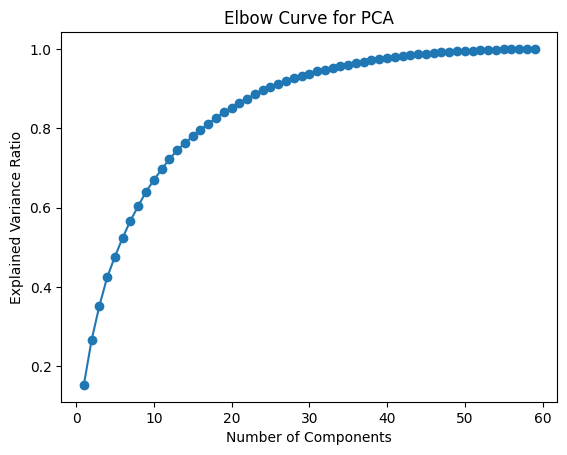

In [20]:
# Applying PCA on n number of components to see how many components needed to
# to achieve more than 90% explained variance ratio

from sklearn.decomposition import PCA

n_components_range=np.arange(1,X_train_sc.shape[1]+1)
explained_variances=[]

for n_component in n_components_range:
    pca=PCA(n_components=n_component)
    X_train_pca=pca.fit_transform(X_train_sc)
    explained_variance=pca.explained_variance_ratio_
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

plt.plot(n_components_range,explained_variances,marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Curve for PCA')
plt.show()

**We see that for n_component=30, we can reach 90% of the explained variance ratio. So we choose n_components=30**

In [21]:
pca=PCA(n_components=30)
X_train_pca=pca.fit_transform(X_train_sc)

In [22]:
print("Shape of X train before PCA: ",X_train_sc.shape)
print("Shape of X train after PCA: ",X_train_pca.shape)


Shape of X train before PCA:  (29238, 59)
Shape of X train after PCA:  (29238, 30)


In [23]:
X_test_pca=pca.transform(X_test_sc)

In [24]:
print("Shape of X test before PCA: ",X_test_sc.shape)
print("Shape of X test after PCA: ",X_test_pca.shape)

Shape of X test before PCA:  (3680, 59)
Shape of X test after PCA:  (3680, 30)


In [42]:
# Predict and evaluate the binary classifier

def evaluate_model(clf,X_train,X_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("=================================================")
    print("Binary Classification - Predictictive Maintenance")
    print("=================================================")
    print("Accuracy:", accuracy_score(y_test, y_pred))

    print("Classification Report:\n", classification_report(y_test, y_pred,
                                                            target_names=['No Anomaly','Anomaly']))
    sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='g',
           yticklabels=['No Anomaly','Anomaly'],xticklabels=['No Anomaly','Anomaly'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score

In [27]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [28]:
model_dict={'Support Vector Classifier':SVC(),
      'Random Forest': RandomForestClassifier(),
      'Gradient Boosting Classifier' : GradientBoostingClassifier(),
      'XGBoost':XGBClassifier()
          }

In [29]:
def model_results(model_dict):
    results=[]
    for modelname,model in model_dict.items():
        model.fit(X_train_pca,y_train)
        acc=accuracy_score(y_test,model.predict(X_test_pca))
        rec=recall_score(y_test,model.predict(X_test_pca))
        f1=f1_score(y_test,model.predict(X_test_pca))
        crossvalscore=np.mean(cross_val_score(model,X_train_pca,y_train,cv=3))
        results.append({'Model Name':modelname,
                        'Accuracy':acc,
                        'Recall':rec,
                        'F1 Score':f1,
                        'Cross Val Score': crossvalscore})
    results_df=pd.DataFrame(results)
    return results_df


In [30]:
model_results(model_dict)

,Model Name,Accuracy,Recall,F1 Score,Cross Val Score
0,Support Vector Classifier,0.982609,0.36,0.219512,0.990184
1,Random Forest,0.994837,0.32,0.457143,0.998940
2,Gradient Boosting Classifier,0.943750,0.52,0.111588,0.965045
3,XGBoost,0.992935,0.32,0.380952,0.997093


#### For all the models, recall is extremely low, which means model isn't performing well on test data

Binary Classification - Predictictive Maintenance
Accuracy: 0.9934782608695653
Classification Report:
               precision    recall  f1-score   support

  No Anomaly       0.99      1.00      1.00      3655
     Anomaly       0.56      0.20      0.29        25

    accuracy                           0.99      3680
   macro avg       0.78      0.60      0.65      3680
weighted avg       0.99      0.99      0.99      3680



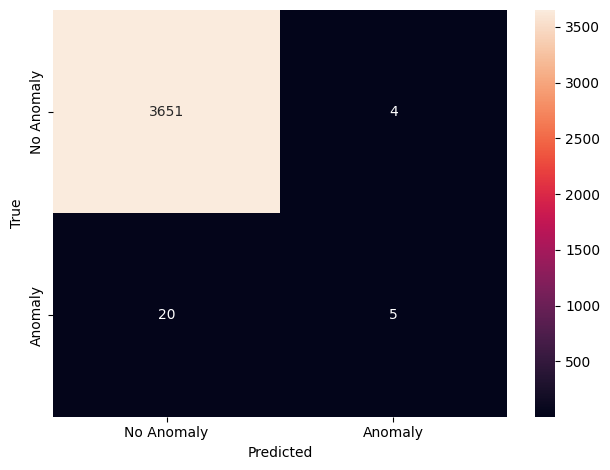

In [43]:
rf_clf=RandomForestClassifier()
evaluate_model(rf_clf,X_train_pca,X_test_pca)

Binary Classification - Predictictive Maintenance
Accuracy: 0.94375
Classification Report:
               precision    recall  f1-score   support

  No Anomaly       1.00      0.95      0.97      3655
     Anomaly       0.06      0.52      0.11        25

    accuracy                           0.94      3680
   macro avg       0.53      0.73      0.54      3680
weighted avg       0.99      0.94      0.97      3680



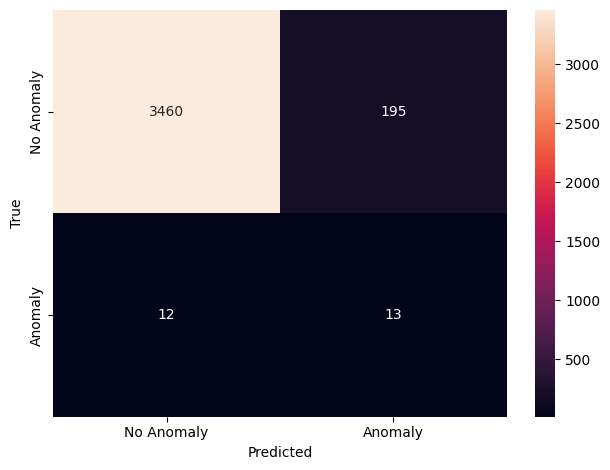

In [44]:
gb_clf=GradientBoostingClassifier()
evaluate_model(gb_clf,X_train_pca,X_test_pca)

#### For both the models, we see from the confusion matrix and classification report that the recall is extremely low. So we use a different method instead of PCA.

## Using Feature Selection

In [61]:
from sklearn.feature_selection import SelectFromModel


In [57]:
# Function to select the best features and show the evaluation metrics for that best model
def select_from_model(clf):
  sfm=SelectFromModel(clf)
  sfm.fit(X_train_sc, y_train)
  sfm.transform(X_train_sc)
  X_train_sc_df=pd.DataFrame(X_train_sc,columns=X.columns)
  X_train_sc_df=X_train_sc_df[X_train_sc_df.columns[sfm.get_support()]]
  X_test_sc_df=pd.DataFrame(X_test_sc,columns=X.columns)
  X_test_sc_df=X_test_sc_df[X_test_sc_df.columns[sfm.get_support()]]
  clf=sfm.estimator_
  evaluate_model(clf,X_train_sc_df,X_test_sc_df)


Binary Classification - Predictictive Maintenance
Accuracy: 0.9739130434782609
Classification Report:
               precision    recall  f1-score   support

  No Anomaly       1.00      0.97      0.99      3655
     Anomaly       0.19      0.84      0.30        25

    accuracy                           0.97      3680
   macro avg       0.59      0.91      0.65      3680
weighted avg       0.99      0.97      0.98      3680



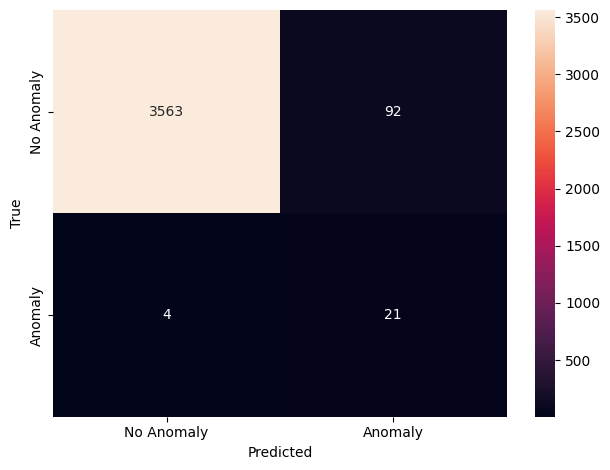

In [58]:

gb_clf2=GradientBoostingClassifier()
gb_clf2.fit(X_train_sc,y_train)
select_from_model(gb_clf2)

Binary Classification - Predictictive Maintenance
Accuracy: 0.9959239130434783
Classification Report:
               precision    recall  f1-score   support

  No Anomaly       1.00      1.00      1.00      3655
     Anomaly       0.67      0.80      0.73        25

    accuracy                           1.00      3680
   macro avg       0.83      0.90      0.86      3680
weighted avg       1.00      1.00      1.00      3680



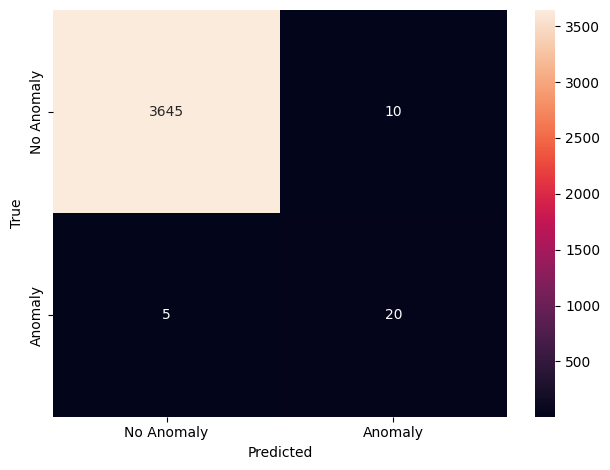

In [59]:
rf_clf2=RandomForestClassifier()
rf_clf2.fit(X_train_sc,y_train)
select_from_model(rf_clf2)

Binary Classification - Predictictive Maintenance
Accuracy: 0.9951086956521739
Classification Report:
               precision    recall  f1-score   support

  No Anomaly       1.00      1.00      1.00      3655
     Anomaly       0.61      0.80      0.69        25

    accuracy                           1.00      3680
   macro avg       0.80      0.90      0.84      3680
weighted avg       1.00      1.00      1.00      3680



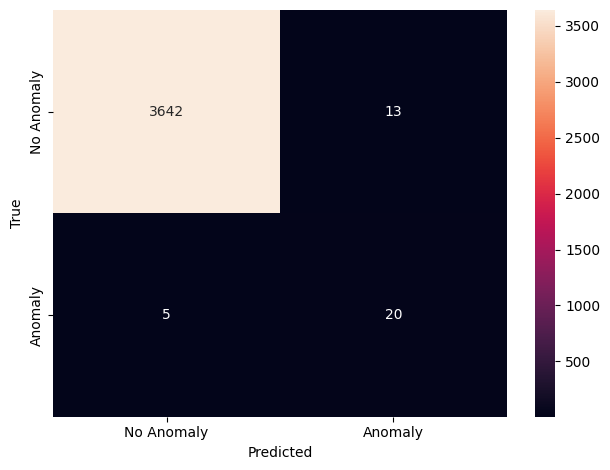

In [60]:
xgb_clf=XGBClassifier()
xgb_clf.fit(X_train_sc,y_train)
select_from_model(xgb_clf)

### As we can see, the Gradient Boosting Classifier has excellent recall on the 'Anomaly'(1) class, but overall accuracy and F1 score is higher for Random Forest Model. The Random Forest Model is also slightly performing better than the XGBoost model

### We see that the test data is highly imbalanced but still model performs very well with feature selection.

### Hyperparameter tuning for the Random Forest Model

In [67]:
  # Selecting the best features and building the Random forest model
  sfm=SelectFromModel(rf_clf2)
  sfm.fit(X_train_sc, y_train)
  sfm.transform(X_train_sc)
  X_train_sc_df=pd.DataFrame(X_train_sc,columns=X.columns)
  X_train_sc_df=X_train_sc_df[X_train_sc_df.columns[sfm.get_support()]]
  X_test_sc_df=pd.DataFrame(X_test_sc,columns=X.columns)
  X_test_sc_df=X_test_sc_df[X_test_sc_df.columns[sfm.get_support()]]
  rf_clf2=sfm.estimator_

In [68]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'n_estimators': [300,400],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1, 2, 4],

}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf2, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_sc_df, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [69]:
# The best Random Forest Model
best_rf_clf=grid_search.best_estimator_

Binary Classification - Predictictive Maintenance
Accuracy: 0.9967391304347826
Classification Report:
               precision    recall  f1-score   support

  No Anomaly       1.00      1.00      1.00      3655
     Anomaly       0.71      0.88      0.79        25

    accuracy                           1.00      3680
   macro avg       0.85      0.94      0.89      3680
weighted avg       1.00      1.00      1.00      3680



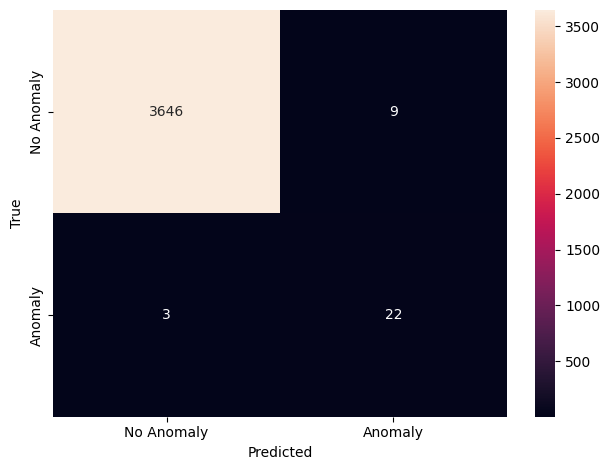

In [70]:
evaluate_model(best_rf_clf,X_train_sc_df,X_test_sc_df)

### As we can see that for our tuned Random Forest model, the accuracy, F1 score has increased compared to the untuned model.

### Saving the model as a pickle file

In [71]:
import pickle

In [74]:
with open('/content/random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_rf_clf, file)

In [75]:
from google.colab import files

# Download the file
files.download('/content/random_forest_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Using Deep Learning

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout



In [123]:
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(59,)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [124]:
model.fit(X_train_sc,y_train,validation_data=(X_test_sc,y_test),batch_size=32,epochs=20)

Epoch 1/20
914/914 [==============================] - 4s 3ms/step - loss: 0.2843 - accuracy: 0.8747 - val_loss: 0.2015 - val_accuracy: 0.9560
Epoch 2/20
914/914 [==============================] - 3s 3ms/step - loss: 0.1018 - accuracy: 0.9655 - val_loss: 0.3090 - val_accuracy: 0.9878
Epoch 3/20
914/914 [==============================] - 4s 4ms/step - loss: 0.0601 - accuracy: 0.9811 - val_loss: 0.5282 - val_accuracy: 0.9875
Epoch 4/20
914/914 [==============================] - 2s 3ms/step - loss: 0.0442 - accuracy: 0.9871 - val_loss: 0.6363 - val_accuracy: 0.9883
Epoch 5/20
914/914 [==============================] - 2s 2ms/step - loss: 0.0318 - accuracy: 0.9903 - val_loss: 0.8399 - val_accuracy: 0.9913
Epoch 6/20
914/914 [==============================] - 2s 3ms/step - loss: 0.0267 - accuracy: 0.9921 - val_loss: 0.9352 - val_accuracy: 0.9908
Epoch 7/20
914/914 [==============================] - 3s 3ms/step - loss: 0.0246 - accuracy: 0.9926 - val_loss: 1.0304 - val_accuracy: 0.9918
Epoch 

In [107]:
loss,accuracy=model.evaluate(X_test_sc,y_test)

115/115 [==============================] - 0s 2ms/step - loss: 2.0330 - accuracy: 0.9937


In [118]:
threshold = 0.5
y_pred_prob=model.predict(X_test_sc)
y_pred_classes = (y_pred_prob >= threshold).astype(int)

115/115 [==============================] - 0s 1ms/step


In [119]:
print("Predicted probabilities:", y_pred_prob[:10].flatten())
print("Predicted classes:", y_pred_classes[:10].flatten())

Predicted probabilities: [1.2075962e-25 6.9271626e-25 1.4649272e-07 8.6643389e-08 6.5011552e-09
 1.6045803e-30 0.0000000e+00 2.7664161e-20 2.7629006e-15 2.2056058e-19]
Predicted classes: [0 0 0 0 0 0 0 0 0 0]


Binary Classification - Predictictive Maintenance
Accuracy: 0.9923913043478261
Classification Report:
               precision    recall  f1-score   support

  No Anomaly       1.00      1.00      1.00      3655
     Anomaly       0.43      0.40      0.42        25

    accuracy                           0.99      3680
   macro avg       0.72      0.70      0.71      3680
weighted avg       0.99      0.99      0.99      3680



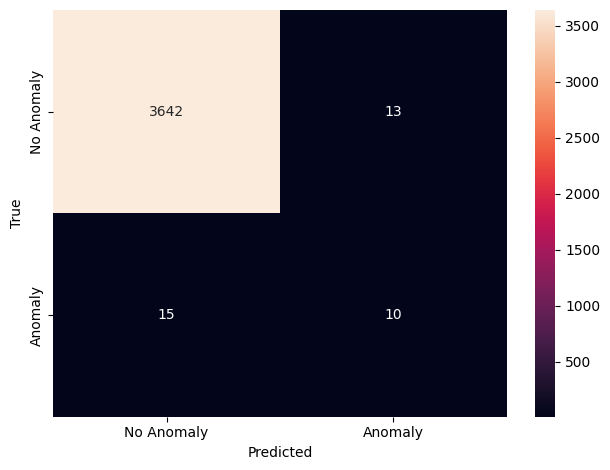

In [121]:
print("=================================================")
print("Binary Classification - Predictictive Maintenance")
print("=================================================")
print("Accuracy:", accuracy_score(y_test, y_pred_classes))

print("Classification Report:\n", classification_report(y_test, y_pred_classes,
                                                        target_names=['No Anomaly','Anomaly']))
sns.heatmap(confusion_matrix(y_test, y_pred_classes),annot=True,fmt='g',
      yticklabels=['No Anomaly','Anomaly'],xticklabels=['No Anomaly','Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

## Deep learning model not performing as good as our Random Forest model.